# Project to visualize and investigate fires in New York City 2013-2018

Where are fires in across New York City and how does the fire department decide to respond to fires? How do they decide how many trucks to send to a fire? 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import json
import seaborn as sns
from matplotlib.colors import LogNorm

Import data from API
link:https://data.cityofnewyork.us/Public-Safety/Fire-Incident-Dispatch-Data/8m42-w767

In [8]:
from sodapy import Socrata
# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofnewyork.us", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofnewyork.us,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("8m42-w767", limit=3500000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)
results_df.head(1)

,starfire_incident_id,incident_datetime,alarm_box_borough,alarm_box_number,alarm_box_location,incident_borough,zipcode,policeprecinct,citycouncildistrict,communitydistrict,...,first_activation_datetime,incident_close_datetime,valid_dispatch_rspns_time_indc,valid_incident_rspns_time_indc,incident_response_seconds_qy,incident_travel_tm_seconds_qy,engines_assigned_quantity,ladders_assigned_quantity,other_units_assigned_quantity,first_on_scene_datetime
0,1836560280150880,2018-12-31T23:59:59.000,QUEENS,6028,95 AVE & 110 ST,QUEENS,11419,102,28,409,...,2019-01-01T00:00:30.000,2019-01-01T00:04:57.000,N,N,0,0,1,0,0,NaN


In [3]:
df_fires = pd.read_csv('Fire_Incident_Dispatch_Data.csv')

In [4]:
df_fires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3375198 entries, 0 to 3375197
Data columns (total 29 columns):
STARFIRE_INCIDENT_ID              float64
INCIDENT_DATETIME                 object
ALARM_BOX_BOROUGH                 object
ALARM_BOX_NUMBER                  int64
ALARM_BOX_LOCATION                object
INCIDENT_BOROUGH                  object
ZIPCODE                           float64
POLICEPRECINCT                    float64
CITYCOUNCILDISTRICT               float64
COMMUNITYDISTRICT                 float64
COMMUNITYSCHOOLDISTRICT           float64
CONGRESSIONALDISTRICT             float64
ALARM_SOURCE_DESCRIPTION_TX       object
ALARM_LEVEL_INDEX_DESCRIPTION     object
HIGHEST_ALARM_LEVEL               object
INCIDENT_CLASSIFICATION           object
INCIDENT_CLASSIFICATION_GROUP     object
DISPATCH_RESPONSE_SECONDS_QY      int64
FIRST_ASSIGNMENT_DATETIME         object
FIRST_ACTIVATION_DATETIME         object
FIRST_ON_SCENE_DATETIME           object
INCIDENT_CLOSE_DATETI

In [5]:
df_fires.isnull().sum()

STARFIRE_INCIDENT_ID                  20
INCIDENT_DATETIME                      0
ALARM_BOX_BOROUGH                      0
ALARM_BOX_NUMBER                       0
ALARM_BOX_LOCATION                     9
INCIDENT_BOROUGH                       0
ZIPCODE                           193048
POLICEPRECINCT                    192890
CITYCOUNCILDISTRICT               194435
COMMUNITYDISTRICT                 192897
COMMUNITYSCHOOLDISTRICT           193750
CONGRESSIONALDISTRICT             194435
ALARM_SOURCE_DESCRIPTION_TX            0
ALARM_LEVEL_INDEX_DESCRIPTION          0
HIGHEST_ALARM_LEVEL                    0
INCIDENT_CLASSIFICATION                0
INCIDENT_CLASSIFICATION_GROUP          0
DISPATCH_RESPONSE_SECONDS_QY           0
FIRST_ASSIGNMENT_DATETIME          17723
FIRST_ACTIVATION_DATETIME          27888
FIRST_ON_SCENE_DATETIME           506157
INCIDENT_CLOSE_DATETIME                0
VALID_DISPATCH_RSPNS_TIME_INDC         0
VALID_INCIDENT_RSPNS_TIME_INDC         0
INCIDENT_RESPONS

In [5]:
pd.options.display.max_columns = None
df_fires.head()

,STARFIRE_INCIDENT_ID,INCIDENT_DATETIME,ALARM_BOX_BOROUGH,ALARM_BOX_NUMBER,ALARM_BOX_LOCATION,INCIDENT_BOROUGH,ZIPCODE,POLICEPRECINCT,CITYCOUNCILDISTRICT,COMMUNITYDISTRICT,COMMUNITYSCHOOLDISTRICT,CONGRESSIONALDISTRICT,ALARM_SOURCE_DESCRIPTION_TX,ALARM_LEVEL_INDEX_DESCRIPTION,HIGHEST_ALARM_LEVEL,INCIDENT_CLASSIFICATION,INCIDENT_CLASSIFICATION_GROUP,DISPATCH_RESPONSE_SECONDS_QY,FIRST_ASSIGNMENT_DATETIME,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,INCIDENT_CLOSE_DATETIME,VALID_DISPATCH_RSPNS_TIME_INDC,VALID_INCIDENT_RSPNS_TIME_INDC,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,ENGINES_ASSIGNED_QUANTITY,LADDERS_ASSIGNED_QUANTITY,OTHER_UNITS_ASSIGNED_QUANTITY
0,1.300121e+15,01/01/2013 12:00:20 AM,BRONX,2147,ST ANN'S AVE & E138 ST,BRONX,10454.0,40.0,8.0,201.0,7.0,15.0,EMS Link/Medical,Initial Alarm,First Alarm,Medical - Assist Civilian,Medical Emergencies,666,01/01/2013 12:11:26 AM,01/01/2013 12:12:01 AM,01/01/2013 12:14:23 AM,01/01/2013 12:20:06 AM,N,N,843,177,1,0,0
1,1.300108e+15,01/01/2013 12:00:37 AM,MANHATTAN,818,11 AVE & 46 ST,MANHATTAN,10036.0,18.0,3.0,104.0,2.0,10.0,Private Fire Alarm,Initial Alarm,First Alarm,Alarm System - Defective,NonMedical Emergencies,56,01/01/2013 12:01:33 AM,01/01/2013 12:01:52 AM,01/01/2013 12:09:03 AM,01/01/2013 12:30:06 AM,N,Y,506,450,1,1,1
2,1.300197e+15,01/01/2013 12:01:17 AM,QUEENS,9656,JAMAICA AVE & 117 ST,QUEENS,11418.0,102.0,29.0,409.0,27.0,5.0,EMS Link/Medical,Initial Alarm,First Alarm,Medical - Assist Civilian,Medical Emergencies,8,01/01/2013 12:01:25 AM,01/01/2013 12:01:43 AM,01/01/2013 12:04:55 AM,01/01/2013 12:15:18 AM,N,Y,218,210,1,0,0
3,1.300140e+15,01/01/2013 12:01:49 AM,QUEENS,4019,WYCKOFF AVE & DECATUR ST,QUEENS,11385.0,104.0,34.0,405.0,24.0,7.0,Private Fire Alarm,Initial Alarm,First Alarm,Alarm System - Defective,NonMedical Emergencies,77,01/01/2013 12:03:06 AM,01/01/2013 12:03:19 AM,01/01/2013 12:06:27 AM,01/01/2013 12:24:56 AM,N,Y,278,201,3,2,1
4,1.300174e+15,01/01/2013 12:02:32 AM,QUEENS,7412,BROADWAY & 44 ST,QUEENS,11103.0,114.0,26.0,401.0,30.0,14.0,UCT/911,Initial Alarm,First Alarm,Utility Emergency - Gas,NonMedical Emergencies,22,01/01/2013 12:02:54 AM,01/01/2013 12:03:14 AM,01/01/2013 12:07:48 AM,01/01/2013 12:40:11 AM,N,Y,316,294,2,1,1


## By inspection, there are a number of columns that are missing data. We could fill the missing zip codes if they were necessary, but we will remove them for now.

In [6]:
df = df_fires.drop(columns=['STARFIRE_INCIDENT_ID',"ALARM_BOX_BOROUGH",'ALARM_BOX_NUMBER','FIRST_ASSIGNMENT_DATETIME',
                            'FIRST_ACTIVATION_DATETIME','POLICEPRECINCT','CITYCOUNCILDISTRICT','COMMUNITYDISTRICT',
                            'COMMUNITYSCHOOLDISTRICT','FIRST_ON_SCENE_DATETIME','CONGRESSIONALDISTRICT'])

In [7]:
# Now we can remove the missing zip codes
df = df[df['ZIPCODE']>0]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3182150 entries, 0 to 3375197
Data columns (total 18 columns):
INCIDENT_DATETIME                 object
ALARM_BOX_LOCATION                object
INCIDENT_BOROUGH                  object
ZIPCODE                           float64
ALARM_SOURCE_DESCRIPTION_TX       object
ALARM_LEVEL_INDEX_DESCRIPTION     object
HIGHEST_ALARM_LEVEL               object
INCIDENT_CLASSIFICATION           object
INCIDENT_CLASSIFICATION_GROUP     object
DISPATCH_RESPONSE_SECONDS_QY      int64
INCIDENT_CLOSE_DATETIME           object
VALID_DISPATCH_RSPNS_TIME_INDC    object
VALID_INCIDENT_RSPNS_TIME_INDC    object
INCIDENT_RESPONSE_SECONDS_QY      int64
INCIDENT_TRAVEL_TM_SECONDS_QY     int64
ENGINES_ASSIGNED_QUANTITY         int64
LADDERS_ASSIGNED_QUANTITY         int64
OTHER_UNITS_ASSIGNED_QUANTITY     int64
dtypes: float64(1), int64(6), object(11)
memory usage: 461.3+ MB


In [9]:
#Convert to datetime
df['time_of_fire'] = pd.to_datetime(df['INCIDENT_DATETIME'])
df = df.drop(columns='INCIDENT_DATETIME')

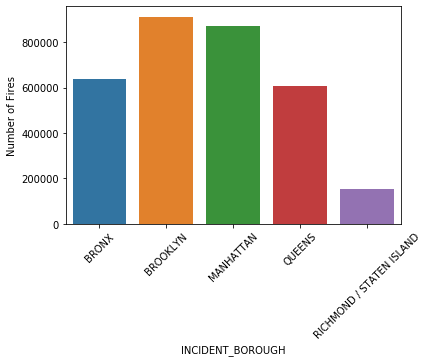

In [10]:
# Let try to vizualise some of the data
num_fires_by_bor = df.groupby('INCIDENT_BOROUGH')['ZIPCODE'].count()
num_fires_by_bor= num_fires_by_bor.reset_index()
num_fires_by_bor.rename(columns = {'ZIPCODE':'Number of Fires'}, inplace=True)
p = sns.barplot(x=num_fires_by_bor['INCIDENT_BOROUGH'],y=num_fires_by_bor['Number of Fires'])
p.set_xticklabels(p.get_xticklabels(), rotation=45)
plt.show()

In [11]:
# We dont have population data in this dataset, but we could think to normalize the data by population

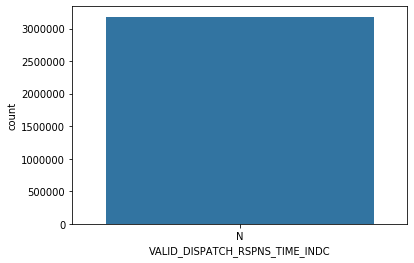

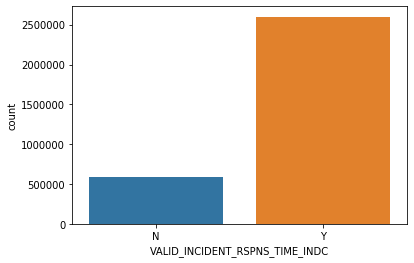

In [12]:
# Going through the remaining columns we can look at valid dispatch and valid incidenct response. It appears we can drop
# Valid dispatch as its always N.
sns.countplot(df['VALID_DISPATCH_RSPNS_TIME_INDC'])
plt.show()
sns.countplot(df['VALID_INCIDENT_RSPNS_TIME_INDC'])

In [13]:
df = df.drop(columns=['VALID_DISPATCH_RSPNS_TIME_INDC','VALID_INCIDENT_RSPNS_TIME_INDC'])

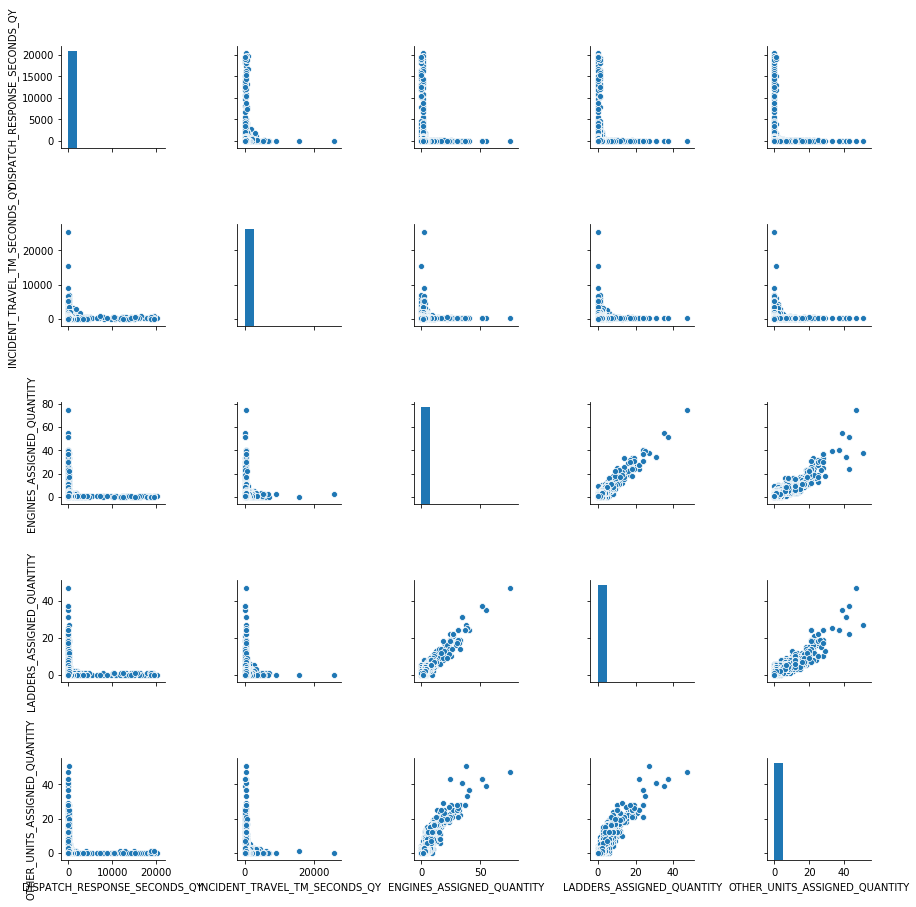

In [14]:
# Now we can see if there if some of the data is already correlated, so we remove it.
# engines, ladders and other units seem like they should be correlated, lets check
# lets take a subset of the datafram to speed up a pairplot.
df_bronx = df[df['INCIDENT_BOROUGH']=='BRONX']
df_bronx = df_bronx[['DISPATCH_RESPONSE_SECONDS_QY','INCIDENT_TRAVEL_TM_SECONDS_QY','ENGINES_ASSIGNED_QUANTITY','LADDERS_ASSIGNED_QUANTITY','OTHER_UNITS_ASSIGNED_QUANTITY']]
sns.pairplot(df_bronx)

In [15]:
# In fact Engine Assigned, Ladders Assigned and Other Units do all appear to be correlated wuth each other.
# Therefore lets drop ladders and other assigned units
df = df.drop(columns=['LADDERS_ASSIGNED_QUANTITY','OTHER_UNITS_ASSIGNED_QUANTITY'])

In [16]:
# We also see that Response time and dispatch time are correlated. 
# It seems that Travel time + dispatch reponse time = Incident response
# We can also drop incident response time
df = df.drop(columns='INCIDENT_RESPONSE_SECONDS_QY')

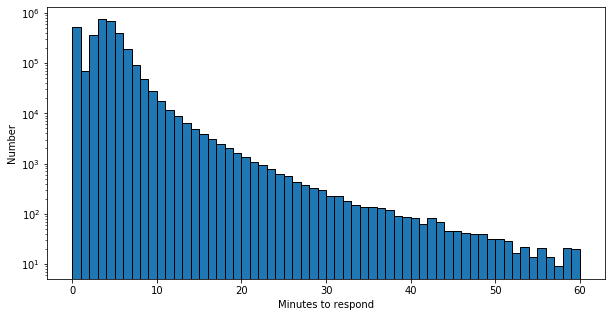

In [17]:
plt.figure(figsize=(10,5))
p = plt.hist(x=df['INCIDENT_TRAVEL_TM_SECONDS_QY']/60,range=(0,60),bins=60,edgecolor='black',log=True)
plt.xlabel('Minutes to respond')
plt.ylabel('Number')
plt.show()

In [18]:
# we can probably remove all the cases where time is more than 30 min. NYC Traffic...
df = df[df['INCIDENT_TRAVEL_TM_SECONDS_QY']<(1800)]

### Let us get a better look at a maping of the data so we can see if there are any trends

In [19]:
#Lets count the number of fires in each zipcode
df['ZIPCODE'] = df['ZIPCODE'].astype(int).astype(str)
df_zip_fires = df.groupby('ZIPCODE')['INCIDENT_BOROUGH'].count()
df_zip_fires = df_zip_fires.reset_index()
df_zip_fires.rename(columns = {'INCIDENT_BOROUGH':'Number_of_Fires'}, inplace=True)

In [20]:
# load GeoJSON
with open('ny_new_york_zip_codes_geo.min.json', 'r') as jsonFile:
    data = json.load(jsonFile)
tmp = data

# remove ZIP codes not in our dataset
geozips = []
for i in range(len(tmp['features'])):
    if tmp['features'][i]['properties']['ZCTA5CE10'] in list(df_zip_fires['ZIPCODE'].unique()):
        geozips.append(tmp['features'][i])

# creating new JSON object
new_json = dict.fromkeys(['type','features'])
new_json['type'] = 'FeatureCollection'
new_json['features'] = geozips

# save JSON object as updated-file
open("updated-nyc-file.json", "w").write(
    json.dumps(new_json, sort_keys=True, indent=4, separators=(',', ': '))
)

3458891

In [21]:
import folium

def create_map(table, zips, mapped_feature):
    #ny_geo = r'nycdata.json'
    m = folium.Map(location = [40.7834345,-73.9662495],zoom_start = 10)
    m.choropleth(geo_data = r'updated-nyc-file.json', 
               #data_out = 'nycdata.json',
               data=table,
               key_on='feature.properties.ZCTA5CE10',
               columns=[zips,mapped_feature],
               fill_opacity=0.7,
               line_opacity=0.2,
               fill_color = 'Reds',
               legend_names = 'Number of fires per Zip Code')
    display(m)
    folium.LayerControl().add_to(m)
    m.save(outfile = mapped_feature + '_map.html')

In [22]:
create_map(df_zip_fires,'ZIPCODE','Number_of_Fires')

C:\Users\jberger\AppData\Local\Continuum\anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


We can see here that there appear to be some pockets of higher fire occurances. However, it is not isolated to one borough. We can ask why certain neighborhoods have higher occurances. For example the LES appears to have a high density. There are both lots of restauarants in that neighborhood and lots of younger people. Possibly its only population size. 

In [23]:
# we can also look at the temporal data to see if anything pops out. 

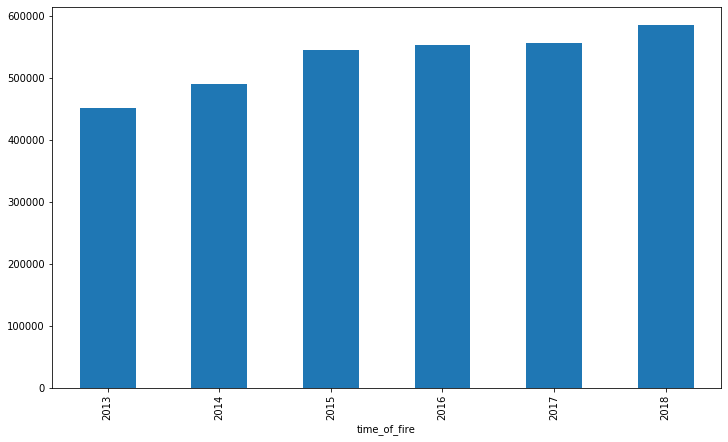

In [24]:
# Plot number of fires per year
plt.figure(figsize=(12,7))
df.groupby(df["time_of_fire"].dt.year)['ZIPCODE'].count().plot(kind="bar")

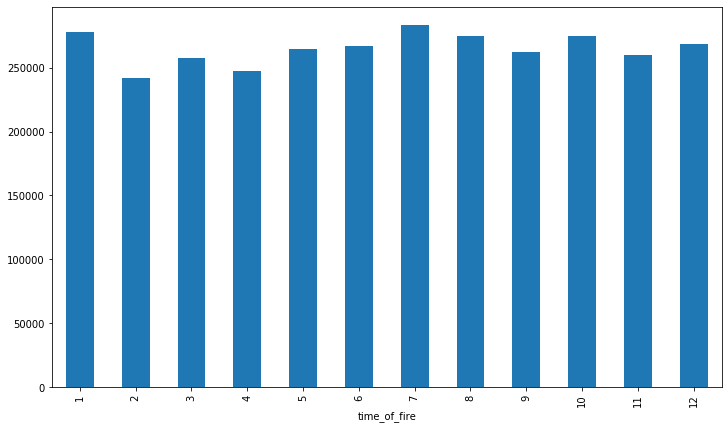

In [25]:
#plot Number of fires per month
plt.figure(figsize=(12,7))
df.groupby(df["time_of_fire"].dt.month)['ZIPCODE'].count().plot(kind="bar")

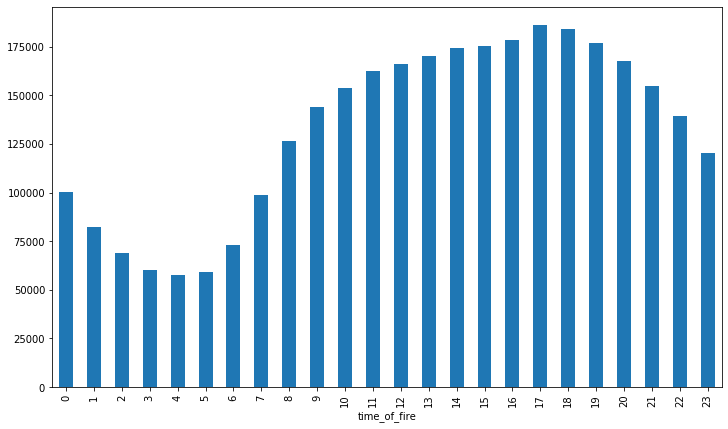

In [26]:
#plot number of fires at different times of the day
plt.figure(figsize=(12,7))
df.groupby(df["time_of_fire"].dt.hour)['ZIPCODE'].count().plot(kind="bar")

In [27]:
#The number of fires each year is growing but it looks similar for each month. 
# Clearly there are more fires in the afternoon than in the morning. 

In [28]:
# Now we can ask, what types of fires these are and how serrious are they?
df['ENGINES_ASSIGNED_QUANTITY'].max()

164

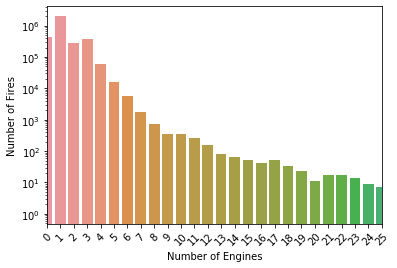

In [29]:
num_engines = df.groupby('ENGINES_ASSIGNED_QUANTITY')['ZIPCODE'].count()
num_engines = num_engines.reset_index()
p = sns.barplot(x=num_engines['ENGINES_ASSIGNED_QUANTITY'],y=num_engines['ZIPCODE'])
p.set_xlabel('Number of Engines')
p.set_ylabel('Number of Fires')
p.set_xlim(0,25)
p.set_xticklabels(p.get_xticklabels(), rotation=45)
p.set_yscale('log')
plt.show()

In [30]:
# typically the data is between 0-8 engines. 0 Enginer is likely an error.
# Lets remove the rows where engines are over 10.
df = df[df['ENGINES_ASSIGNED_QUANTITY']<=10]

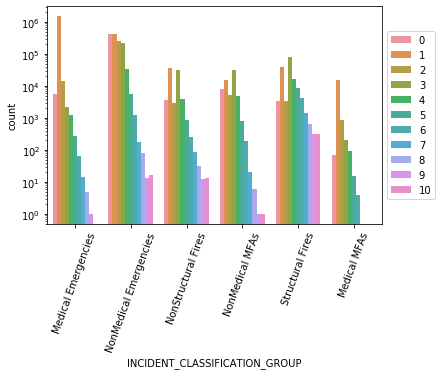

In [31]:
p = sns.countplot(data = df, x = df['INCIDENT_CLASSIFICATION_GROUP'],hue='ENGINES_ASSIGNED_QUANTITY')
p.set_xticklabels(p.get_xticklabels(), rotation=70)
p.set_yscale('log')
#p.set_ylim(0,100000)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

Interestingly we can see that there appears to be a lot of variation with the number of trucks sent. It seems 0 is very likely for non-medical, 1-4 are likely for medical emergencies, 1 or 3 are likely for MFAs or structural fires. 
Why is this? Is there a way to understand the variable that lead to the nubmer of trucks sent? 

In [32]:
df.groupby('INCIDENT_CLASSIFICATION').count().sort_values('ZIPCODE',ascending=False).head(50)

,ALARM_BOX_LOCATION,INCIDENT_BOROUGH,ZIPCODE,ALARM_SOURCE_DESCRIPTION_TX,ALARM_LEVEL_INDEX_DESCRIPTION,HIGHEST_ALARM_LEVEL,INCIDENT_CLASSIFICATION_GROUP,DISPATCH_RESPONSE_SECONDS_QY,INCIDENT_CLOSE_DATETIME,INCIDENT_TRAVEL_TM_SECONDS_QY,ENGINES_ASSIGNED_QUANTITY,time_of_fire
INCIDENT_CLASSIFICATION,,,,,,,,,,,,
Medical - Assist Civilian,979693,979693,979693,979693,979693,979693,979693,979693,979693,979693,979693,979693
Assist Civilian - Non-Medical,447550,447550,447550,447550,447550,447550,447550,447550,447550,447550,447550,447550
Medical - EMS Link 10-91,297138,297138,297138,297138,297138,297138,297138,297138,297138,297138,297138,297138
Medical - PD Link 10-91,245371,245371,245371,245371,245371,245371,245371,245371,245371,245371,245371,245371
Odor - Other Than Smoke,136827,136827,136827,136827,136827,136827,136827,136827,136827,136827,136827,136827
Utility Emergency - Gas,129251,129251,129251,129251,129251,129251,129251,129251,129251,129251,129251,129251
Alarm System - Defective,118716,118716,118716,118716,118716,118716,118716,118716,118716,118716,118716,118716
Utility Emergency - Water,102282,102282,102282,102282,102282,102282,102282,102282,102282,102282,102282,102282
Vehicle Accident - Other,69536,69536,69536,69536,69536,69536,69536,69536,69536,69536,69536,69536


C:\Users\jberger\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


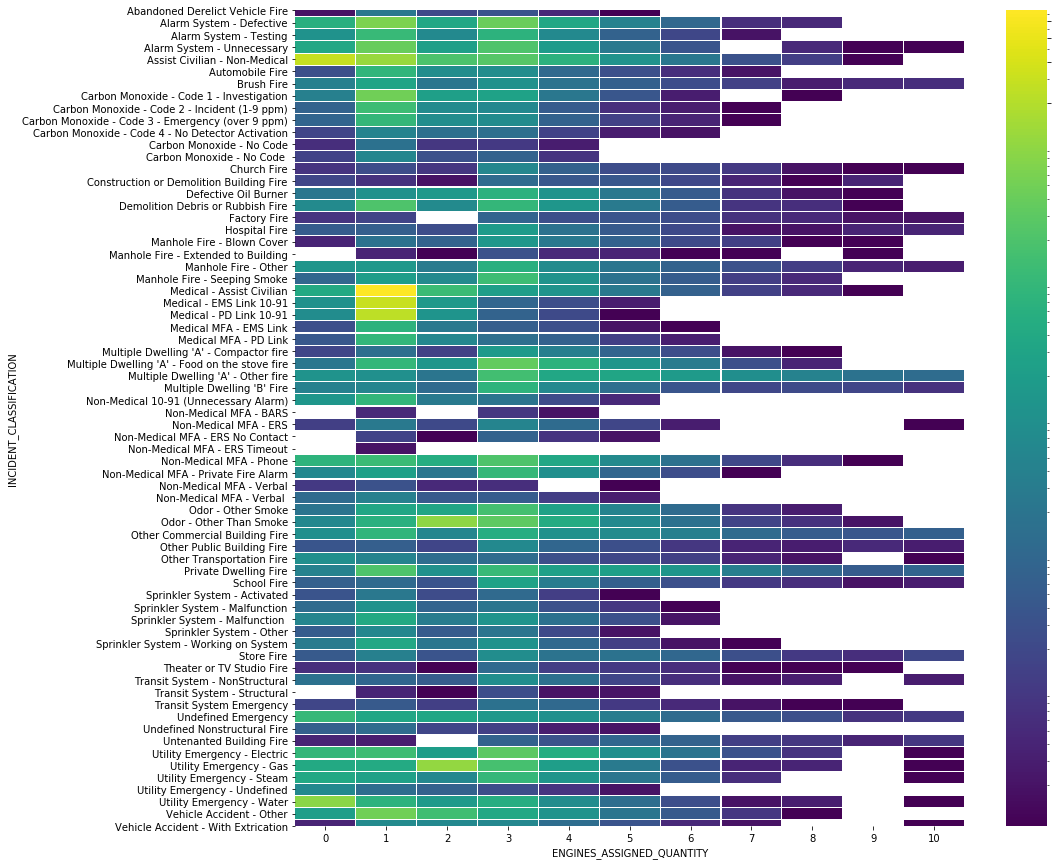

In [33]:
fire_type = df.groupby(['INCIDENT_CLASSIFICATION','ENGINES_ASSIGNED_QUANTITY'])['ZIPCODE'].count()
plt.figure(figsize=(15,15))
sns.heatmap(fire_type.unstack(), cmap='viridis',linewidths=.1,norm=LogNorm(fire_type.min(),fire_type.max()))

In [34]:
# While the data above is interesting, it would only be available after the fire, typically.

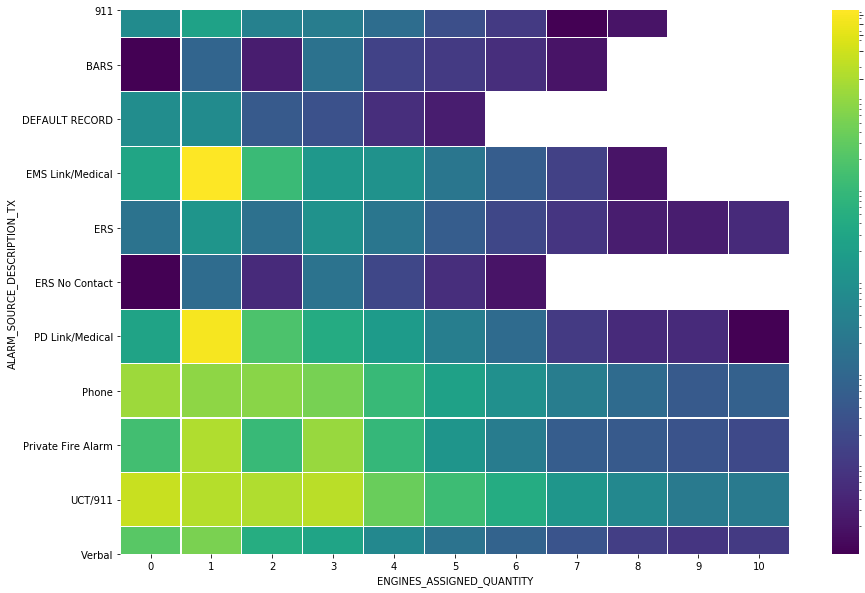

In [35]:
fire_call = df.groupby(['ALARM_SOURCE_DESCRIPTION_TX','ENGINES_ASSIGNED_QUANTITY'])['ZIPCODE'].count()
plt.figure(figsize=(15,10))
sns.heatmap(fire_call.unstack(), cmap='viridis',linewidths=.1,norm=LogNorm(fire_call.min(),fire_call.max()))

In [36]:
# We can remove default record since it is unclear what that refers to and combine the 911 column.
df = df[df['ALARM_SOURCE_DESCRIPTION_TX']!= 'DEFAULT RECORD']

In [37]:
df['ALARM_SOURCE_DESCRIPTION_TX'].replace('911','UCT/911', inplace=True)

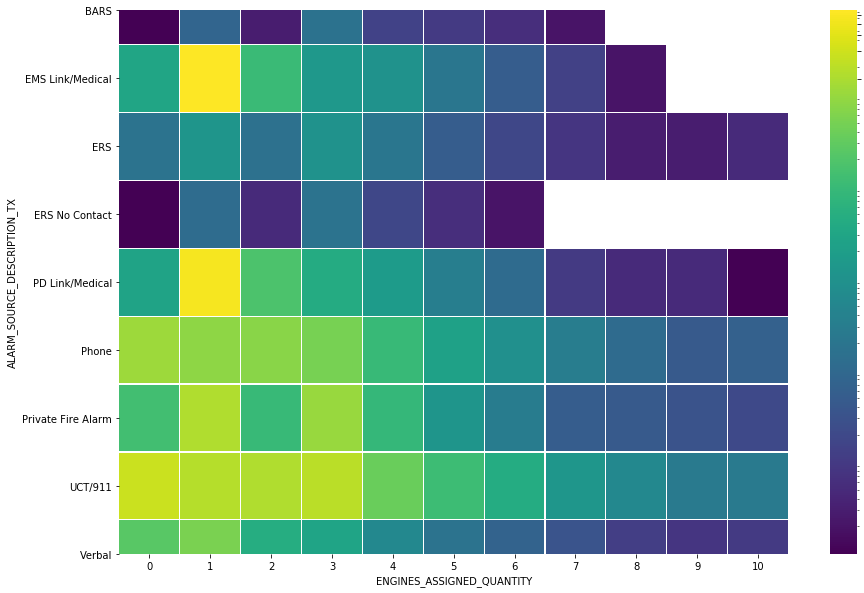

In [38]:
fire_call = df.groupby(['ALARM_SOURCE_DESCRIPTION_TX','ENGINES_ASSIGNED_QUANTITY'])['ZIPCODE'].count()
plt.figure(figsize=(15,10))
sns.heatmap(fire_call.unstack(), cmap='viridis',linewidths=.1,norm=LogNorm(fire_call.min(),fire_call.max()))

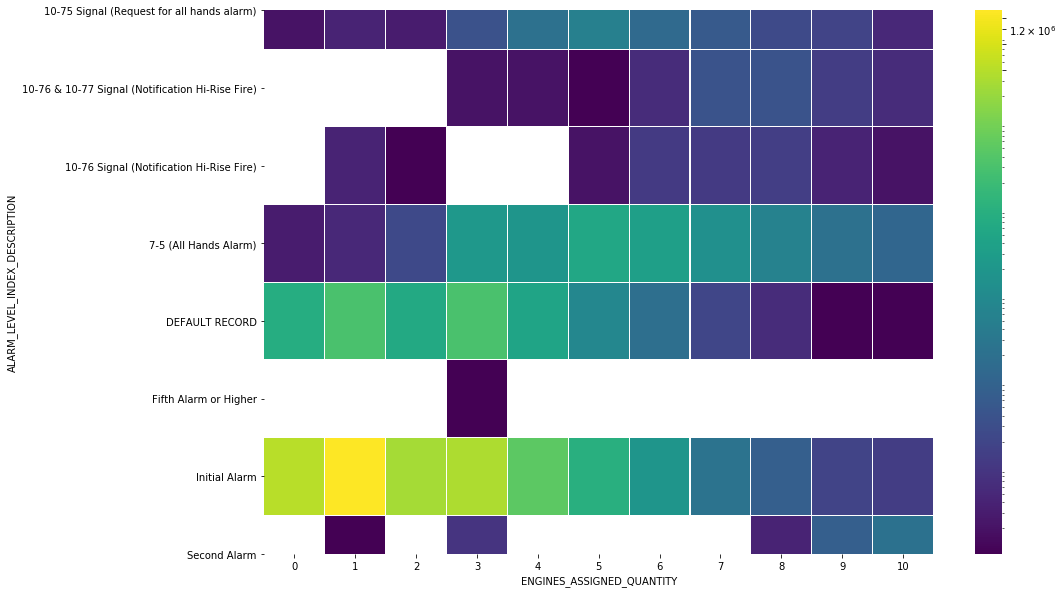

In [39]:
fire_alarm = df.groupby(['ALARM_LEVEL_INDEX_DESCRIPTION','ENGINES_ASSIGNED_QUANTITY'])['ZIPCODE'].count()
plt.figure(figsize=(15,10))
sns.heatmap(fire_alarm.unstack(), cmap='viridis',linewidths=.1,norm=LogNorm(fire_alarm.min(),fire_alarm.max()))

In [40]:
#This columns appear to have duplicates and its unclear what Defualt record is. Lets clean up this data
# delete decault record
df = df[(df['ALARM_LEVEL_INDEX_DESCRIPTION']!='DEFAULT RECORD')&(df['ALARM_LEVEL_INDEX_DESCRIPTION']!='Fifth Alarm or Higher')]

In [41]:
#It appaers the 10-76 and 10-77 can be combined into one columns
df['ALARM_LEVEL_INDEX_DESCRIPTION'].replace('10-76 Signal (Notification Hi-Rise Fire)',
                                            '10-76 & 10-77 Signal (Notification Hi-Rise Fire)', inplace=True)

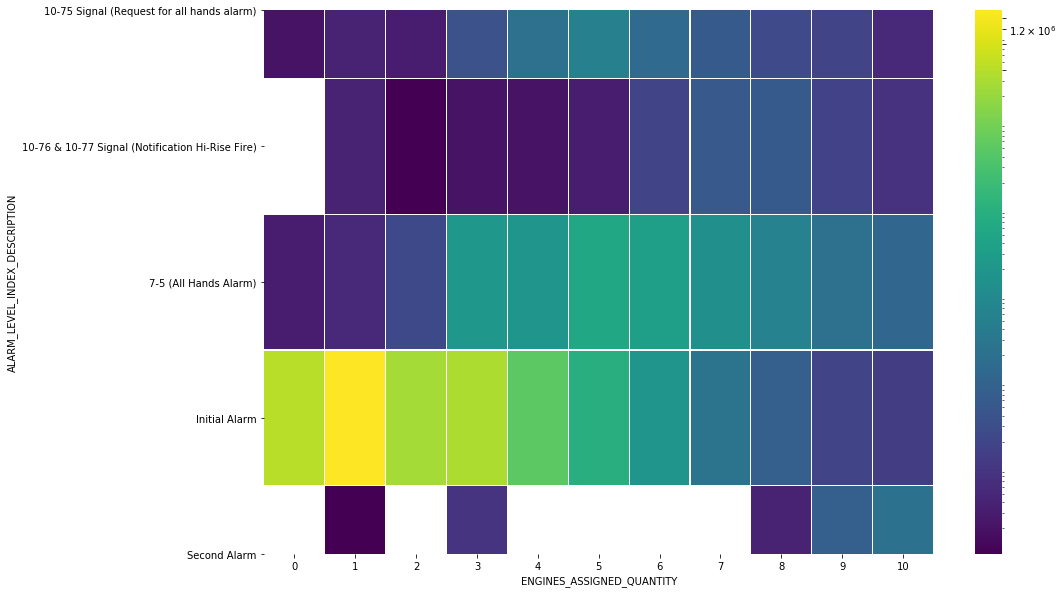

In [42]:
fire_alarm = df.groupby(['ALARM_LEVEL_INDEX_DESCRIPTION','ENGINES_ASSIGNED_QUANTITY'])['ZIPCODE'].count()
plt.figure(figsize=(15,10))
sns.heatmap(fire_alarm.unstack(), cmap='viridis',linewidths=.1,norm=LogNorm(fire_alarm.min(),fire_alarm.max()))

In [43]:
df.columns

Index(['ALARM_BOX_LOCATION', 'INCIDENT_BOROUGH', 'ZIPCODE',
       'ALARM_SOURCE_DESCRIPTION_TX', 'ALARM_LEVEL_INDEX_DESCRIPTION',
       'HIGHEST_ALARM_LEVEL', 'INCIDENT_CLASSIFICATION',
       'INCIDENT_CLASSIFICATION_GROUP', 'DISPATCH_RESPONSE_SECONDS_QY',
       'INCIDENT_CLOSE_DATETIME', 'INCIDENT_TRAVEL_TM_SECONDS_QY',
       'ENGINES_ASSIGNED_QUANTITY', 'time_of_fire'],
      dtype='object')

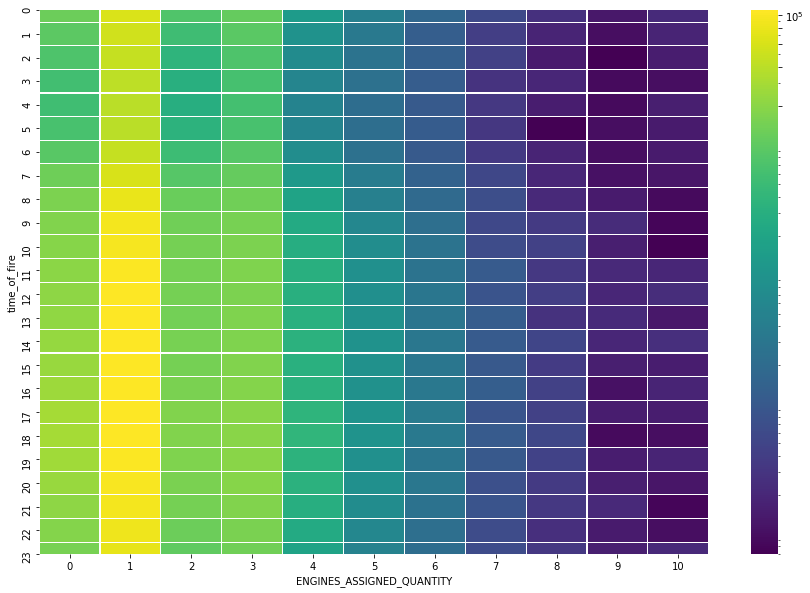

In [44]:
# Number of fire engines assigned depending on the time of day.
time_of_fire = df.groupby([df["time_of_fire"].dt.hour,'ENGINES_ASSIGNED_QUANTITY'])['ZIPCODE'].count()
plt.figure(figsize=(15,10))
sns.heatmap(time_of_fire.unstack(), cmap='viridis',linewidths=.1,norm=LogNorm(time_of_fire.min(),time_of_fire.max()))

In [45]:
# It is unclear why 0 engines would be assigned so we will remove that data for the prediction model
df = df[df['ENGINES_ASSIGNED_QUANTITY']>0]

In [46]:
percent_engines = 100*df.groupby('ENGINES_ASSIGNED_QUANTITY')["ZIPCODE"].count()/len(df['ENGINES_ASSIGNED_QUANTITY'])
print(percent_engines)
print ('\n')
print(percent_engines[0:3].sum())

ENGINES_ASSIGNED_QUANTITY
1     74.110732
2     10.250847
3     12.690068
4      2.053196
5      0.566660
6      0.209099
7      0.064906
8      0.028164
9      0.013034
10     0.013296
Name: ZIPCODE, dtype: float64


97.05164692721027


In [47]:
# We can probably limit our model selection to only 1 - 3 engines
# Remove rows other than where engines are 1 - 3
df_engines_one_two_three = df[df['ENGINES_ASSIGNED_QUANTITY']<=3]

## Chose best features for predicting the number of fire trucks to send.
- It appears  that 'Alarm Source' and Alarm Classification group may be good features to predict the number of needed fire engines

In [48]:
from sklearn.model_selection import train_test_split

In [74]:
X = df_engines_one_two_three.drop(columns='ENGINES_ASSIGNED_QUANTITY')
y= df_engines_one_two_three['ENGINES_ASSIGNED_QUANTITY']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [75]:
alarm_source = pd.get_dummies(X_train['ALARM_SOURCE_DESCRIPTION_TX'])
alarm_group = pd.get_dummies(X_train['INCIDENT_CLASSIFICATION_GROUP'])
alarm_level = pd.get_dummies(X_train['ALARM_LEVEL_INDEX_DESCRIPTION'])

In [76]:
train_data = pd.concat([alarm_group, alarm_source, alarm_level],axis=1)
train_data.head(1)

,Medical Emergencies,NonMedical Emergencies,NonStructural Fires,Structural Fires,BARS,EMS Link/Medical,ERS,ERS No Contact,PD Link/Medical,Phone,Private Fire Alarm,UCT/911,Verbal,10-75 Signal (Request for all hands alarm),10-76 & 10-77 Signal (Notification Hi-Rise Fire),7-5 (All Hands Alarm),Initial Alarm,Second Alarm
2740258,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [77]:
alarm_source = pd.get_dummies(X_test['ALARM_SOURCE_DESCRIPTION_TX'])
alarm_group = pd.get_dummies(X_test['INCIDENT_CLASSIFICATION_GROUP'])
alarm_level = pd.get_dummies(X_test['ALARM_LEVEL_INDEX_DESCRIPTION'])
test_data = pd.concat([alarm_group, alarm_source, alarm_level],axis=1)

## Lets try a random forest model

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
rtree = RandomForestClassifier(n_estimators=100)

In [79]:
rtree.fit(train_data,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [80]:
predict = rtree.predict(test_data)

In [57]:
from sklearn.metrics import confusion_matrix, classification_report

In [82]:
print(confusion_matrix(y_test,predict))
print(classification_report(y_test,predict))

[[886504 101522   1714]
 [ 22286 113713    704]
 [ 65202  71546  32465]]
              precision    recall  f1-score   support

           1       0.91      0.90      0.90    989740
           2       0.40      0.83      0.54    136703
           3       0.93      0.19      0.32    169213

    accuracy                           0.80   1295656
   macro avg       0.75      0.64      0.59   1295656
weighted avg       0.86      0.80      0.79   1295656



In [59]:
features = pd.DataFrame(rtree.feature_importances_,test_data.columns,columns=['Feature Importance']).sort_values('Feature Importance',ascending= False)
features

,Feature Importance
Medical Emergencies,3.116630e-01
NonMedical Emergencies,1.952601e-01
UCT/911,1.497189e-01
Structural Fires,8.093905e-02
EMS Link/Medical,6.965979e-02
Private Fire Alarm,6.250194e-02
Phone,4.707495e-02
PD Link/Medical,4.438232e-02
NonStructural Fires,1.848588e-02
Verbal,1.802544e-02


## The model is okay, but the data is heavily weighted by the large number of instances where only one engine is sent. If we randomly select the same number of egines 1 2 and 3, maybe we can improve the model

In [60]:
# lets select 37k values from the instance where num engines = 1
df_1_engine = df[df['ENGINES_ASSIGNED_QUANTITY']==1]
df_1_engine = df_1_engine.reset_index()
interval = len(df_1_engine)//300000

In [61]:
# determine the value of the rows to keep from full list of rows for engines = 1
rows_to_keep = []
for i in range(0,len(df_1_engine)):
    if i % interval == 0:
        rows_to_keep.append(i)
    else:
        continue

In [62]:
df_1_engine = df_1_engine.reset_index()
df_1_engine = df_1_engine[df_1_engine['level_0'].isin(rows_to_keep)]
df_1_engine.drop(columns=['level_0','index'],inplace=True)

In [63]:
df_2_engine = df[df['ENGINES_ASSIGNED_QUANTITY']==2]
df_3_engine = df[df['ENGINES_ASSIGNED_QUANTITY']==3]
df_new = pd.concat([df_1_engine,df_2_engine,df_3_engine],ignore_index=True)

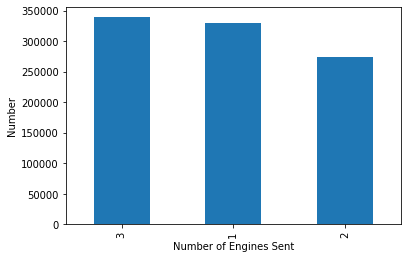

In [64]:
df_new['ENGINES_ASSIGNED_QUANTITY'].value_counts().plot(kind='bar')
plt.xlabel('Number of Engines Sent')
plt.ylabel('Number')
plt.show()

## Now lets try to run another random forest model on data

In [91]:
X = df_new.drop(columns='ENGINES_ASSIGNED_QUANTITY')
y= df_new['ENGINES_ASSIGNED_QUANTITY']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [92]:
# Create train data set
alarm_source = pd.get_dummies(X_train['ALARM_SOURCE_DESCRIPTION_TX'])
alarm_group = pd.get_dummies(X_train['INCIDENT_CLASSIFICATION_GROUP'])
alarm_level = pd.get_dummies(X_train['ALARM_LEVEL_INDEX_DESCRIPTION'])
train_data = pd.concat([alarm_group, alarm_source, alarm_level],axis=1)

In [93]:
# Create test data set
alarm_source = pd.get_dummies(X_test['ALARM_SOURCE_DESCRIPTION_TX'])
alarm_group = pd.get_dummies(X_test['INCIDENT_CLASSIFICATION_GROUP'])
alarm_level = pd.get_dummies(X_test['ALARM_LEVEL_INDEX_DESCRIPTION'])
test_data = pd.concat([alarm_group, alarm_source, alarm_level],axis=1)

In [104]:
rtree = RandomForestClassifier(n_estimators=200)

In [105]:
rtree.fit(train_data,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [100]:
predict = rtree.predict(test_data)

In [103]:
print(confusion_matrix(y_test,predict))
print(classification_report(y_test,predict))

[[127575  20375  16721]
 [  9372 120641   6949]
 [  2104  73835  93592]]
              precision    recall  f1-score   support

           1       0.92      0.77      0.84    164671
           2       0.56      0.88      0.69    136962
           3       0.80      0.55      0.65    169531

    accuracy                           0.73    471164
   macro avg       0.76      0.74      0.73    471164
weighted avg       0.77      0.73      0.73    471164



In [72]:
features = pd.DataFrame(rtree.feature_importances_,test_data.columns,columns=['Feature Importance']).sort_values('Feature Importance',ascending= False)
features

,Feature Importance
Medical Emergencies,0.307222
NonMedical Emergencies,0.187984
EMS Link/Medical,0.098829
UCT/911,0.097360
Private Fire Alarm,0.084223
Structural Fires,0.074484
PD Link/Medical,0.070003
Phone,0.046956
NonStructural Fires,0.022562
Verbal,0.008378
